## Heading Estimator for Fly Trajectories
This notebook serves as both a tutorial and a method by which one can generate realistic heading trajectories. We walk through the steps of importing data, augmenting data, making sure the coordinate frames are correct, and fine-tuning the generated headings. 

In [1]:
import pandas as pd 

### Import Data
If this notebook is in the same folder as the data, then you can simply set 'path' as the name of the data file. Note: you will need to call the appropriate pandas method to import your data (e.g. for a csv, you'll need pd.read_csv)

In [2]:
df = pd.read_parquet('traj0.parquet')
df.head()

,time,v_para,v_perp,phi,phidot,w,zeta,I,m,C_para,...,PFNa_c7,PFNa_c8,PFNa_c9,PFNa_c10,PFNa_c11,PFNa_c12,PFNa_c13,PFNa_c14,PFNa_c15,PFNa_c16
0,0.000,0.284229,0.000000,0.768995,0.070393,0.430978,4.197209,0.52,0.25,1.470588,...,0.468123,0.271583,0.081941,0.000039,0.088696,0.295977,0.500461,0.582362,0.493706,0.286424
1,0.002,0.277376,-0.001263,0.769129,0.064397,0.429015,4.197223,0.52,0.25,1.470588,...,0.467882,0.271465,0.081966,0.000039,0.088666,0.295931,0.500422,0.582350,0.493723,0.286457
2,0.004,0.271775,-0.002309,0.769258,0.064752,0.429065,4.197206,0.52,0.25,1.470588,...,0.467809,0.271442,0.081992,0.000038,0.088638,0.295891,0.500392,0.582346,0.493746,0.286492
3,0.006,0.267246,-0.003151,0.769398,0.074770,0.429177,4.197187,0.52,0.25,1.470588,...,0.467750,0.271431,0.082020,0.000037,0.088608,0.295849,0.500360,0.582342,0.493771,0.286531
4,0.008,0.263608,-0.003803,0.769570,0.096680,0.429336,4.197167,0.52,0.25,1.470588,...,0.467718,0.271440,0.082054,0.000036,0.088572,0.295797,0.500322,0.582340,0.493805,0.286579


### Augment Data and Correct Coordinate Frames
The predictor has three inputs:
- groundspeed velocity
- airspeed velocity
- thrust vector 

Each input is composed of two parts, corresponding to the magnitude and direction of the vectors: 
- groundspeed 
- groundspeed_angle
- airspeed 
- airspeed_angle
- thrust
- thrust_angle
  
These inputs will need to be columns in the dataframe in order for the predictor to work. Further, the coordinate frame on which this predictor was trained is as follows:

- positive x is upwind
- positive y is crosswind such that the cross-product of the two vectors points out of the screen. 

For the experimental data on which this predictor was trained, the wind was coming from the right (that is, the wind's heading was in the negative x direction).

One will need to take into account any coordinate frame differences when computing the inputs. 

#### A note on computing thrust
The following code-snippet will compute the thrust vector. This model for computing thrust was pulled from some paper, I cant quite remember which one.

```python
# Compute thrust and thrust angle
mass = 0.25e-6
dragcoeff = mass / 0.170

thrust_x = mass * accel_x + dragcoeff * airspeed_x
thrust_y = mass * accel_y + dragcoeff * airspeed_y

augmented_trajectory["thrust"] = np.sqrt(thrust_x ** 2 + thrust_y ** 2)
augmented_trajectory["thrust_angle"] = np.arctan2(thrust_y, thrust_x)
```

### Example 
The following is an example of importing data and fine-tuning the generated headings. The data augmentation and coordinate frame corrections are not shown, as those are highly dependent on the nature of the input data. Note: there are default heading fields in the importated data, but these are just the course heading. 

In [9]:
David_fly_data = pd.read_csv(f'David_test_data.csv')
David_fly_data.head()

,Unnamed: 0.1,Unnamed: 0,trajec_objid,timestamp,position_x,position_y,velocity_x,velocity_y,heading_angle,windspeed,...,heading_angle_x,heading_angle_y,groundspeed,groundspeed_angle,airspeed,airspeed_angle,linear_acceleration,linear_acceleration_angle,thrust,thrust_angle
0,31910,31910,1562,1.664335e+09,0.020781,-0.045811,0.389693,-0.144912,-0.356017,0.4,...,0.937293,-0.348544,0.415765,-0.356017,0.802879,-0.181485,1.177479,-0.634755,0.000001,-0.270437
1,31911,31911,1562,1.664335e+09,0.024804,-0.047357,0.397793,-0.150510,-0.361715,0.4,...,0.935291,-0.353879,0.425315,-0.361715,0.811867,-0.186466,1.101346,-0.658927,0.000001,-0.273316
2,31912,31912,1562,1.664335e+09,0.028873,-0.048953,0.403604,-0.155913,-0.368642,0.4,...,0.932817,-0.360349,0.432672,-0.368642,0.818590,-0.191636,0.981769,-0.705036,0.000001,-0.276468
3,31913,31913,1562,1.664335e+09,0.033028,-0.050692,0.411210,-0.166896,-0.385552,0.4,...,0.926591,-0.376070,0.443788,-0.385552,0.828201,-0.202905,0.842229,-0.777039,0.000001,-0.284713
4,31914,31914,1562,1.664335e+09,0.037260,-0.052462,0.418456,-0.173383,-0.392806,0.4,...,0.923839,-0.382782,0.452954,-0.392806,0.836620,-0.208755,0.699097,-0.885288,0.000001,-0.288655


In [15]:
import matplotlib
import matplotlib.pyplot as plt
def augment_with_time_delay_embedding(fly_traj_list: list[pd.DataFrame],**kwargs):
    def collect_offset_rows(df, aug_column_names=None, keep_column_names=None, w=1, direction='backward'):
        """ Takes a pandas data frame with n rows, list of columns names, and a window size w.
            Then creates an augmented data frame that collects prior or future rows (in window)
            and stacks them as new columns. The augmented data frame will be size (n - w - 1) as the first/last
            w rows do not have enough data before/after them.

            Inputs
                df: pandas data frame
                aug_column_names: names of the columns to augment
                keep_column_names: names of the columns to keep, but not augment
                w: lookback window size (# of rows)
                direction: get the rows from behind ('backward') or front ('forward')

            Outputs
                df_aug: augmented pandas data frame.
                        new columns are named: old_name_0, old_name_1, ... , old_name_w-1
        """

        df = df.reset_index(drop=True)

        # Default for testing
        if df is None:
            df = np.atleast_2d(np.arange(0, 11, 1, dtype=np.double)).T
            df = np.matlib.repmat(df, 1, 4)
            df = pd.DataFrame(df, columns=['a', 'b', 'c', 'd'])
            aug_column_names = ['a', 'b']
        else:  # use the input  values
            # Default is all columns
            if aug_column_names is None:
                aug_column_names = df.columns

        # Make new column names & dictionary to store data
        new_column_names = {}
        df_aug_dict = {}
        for a in aug_column_names:
            new_column_names[a] = []
            df_aug_dict[a] = []

        for a in aug_column_names:  # each augmented column
            for k in range(w):  # each point in lookback window
                new_column_names[a].append(a + '_' + str(k))

        # Augment data
        n_row = df.shape[0]  # # of rows
        n_row_train = n_row - w + 1  # # of rows in augmented data
        for a in aug_column_names:  # each column to augment
            data = df.loc[:, [a]]  # data to augment
            data = np.asmatrix(data)  # as numpy matrix
            df_aug_dict[a] = np.nan * np.ones((n_row_train, len(new_column_names[a])))  # new augmented data matrix

            # Put augmented data in new column, for each column to augment
            for i in range(len(new_column_names[a])):  # each column to augment
                if direction == 'backward':
                    # Start index, starts at the lookback window size & slides up by 1 for each point in window
                    startI = w - 1 - i

                    # End index, starts at end of the matrix &  & slides up by 1 for each point in window
                    endI = n_row - i  # end index, starts at end of matrix &

                elif direction == 'forward':
                    # Start index, starts at the beginning of matrix & slides up down by 1 for each point in window
                    startI = i

                    # End index, starts at end of the matrix minus the window size
                    # & slides down by 1 for each point in window
                    endI = n_row - w + 1 + i  # end index, starts at end of matrix &

                else:
                    raise Exception("direction must be 'forward' or 'backward'")

                # Put augmented data in new column
                df_aug_dict[a][:, i] = np.squeeze(data[startI:endI, :])

            # Convert data to pandas data frame & set new column names
            df_aug_dict[a] = pd.DataFrame(df_aug_dict[a], columns=new_column_names[a])

        # Combine augmented column data
        df_aug = pd.concat(list(df_aug_dict.values()), axis=1)

        # Add non-augmented data, if specified
        if keep_column_names is not None:
            for c in keep_column_names:
                if direction == 'backward':
                    startI = w - 1
                    endI = n_row
                elif direction == 'forward':
                    startI = 0
                    endI = n_row - w
                else:
                    raise Exception("direction must be 'forward' or 'backward'")

                keep = df.loc[startI:endI, [c]].reset_index(drop=True)
                df_aug = pd.concat([df_aug, keep], axis=1)

        return df_aug
    time_window = kwargs["time_window"]
    input_names = kwargs["input_names"]
    output_names = kwargs["output_names"]
    direction = kwargs["direction"]
    traj_augment_list = []
    for traj in fly_traj_list:
        traj_augment = collect_offset_rows(traj,
                                                aug_column_names=input_names,
                                                keep_column_names=output_names,
                                                w=time_window,
                                                direction=direction)

        traj_augment_list.append(traj_augment)

    traj_augment_all = pd.concat(traj_augment_list, ignore_index=True)

    return np.round(traj_augment_all, 4)
    
def plot_trajectory_with_predicted_heading(
    trajectory: pd.DataFrame, 
    axis: plt.Axes, 
    n_input: int, 
    best_estimator,
    nskip: int = 0,
    arrow_size=None,
    include_id=False,
    plt_show=False,
    smooth=False,
    **kwargs
):
    # ---------------------------------------------------------------
    # Predict heading from fly trajectory using time-delay embedding
    # ---------------------------------------------------------------
    def predict_heading_from_fly_trajectory(
        df: pd.DataFrame, 
        n_input, 
        augment_with_time_delay_embedding: callable, 
        estimator: callable, 
        **kwargs
    ):
        # Augment data (e.g., time-delay embedding)
        augmented_df = augment_with_time_delay_embedding([df], **kwargs)
        augmented_df = augmented_df.iloc[:, 0:n_input]

        # Predict heading vectors (as components)
        heading_components = estimator.predict(augmented_df)

        # Optional smoothing (Gaussian filter)
        if smooth:
            sigma = 2  # Standard deviation for Gaussian smoothing
            heading_components = gaussian_filter1d(heading_components, sigma=sigma, axis=0)

        # Convert x, y components to angle
        heading_angle_predicted = np.arctan2(heading_components[:, 1], heading_components[:, 0])

        # Handle size mismatch due to time-delay embedding
        num_missing = len(df["position_x"]) - len(heading_angle_predicted)
        prepend_values = np.array([heading_angle_predicted[0]] * num_missing)
        heading_angle_predicted_arr = np.concatenate([prepend_values, heading_angle_predicted])

        return heading_angle_predicted_arr

    # ------------------------------------
    # Plot trajectory with heading arrows
    # ------------------------------------
    def plot_trajectory(
        xpos, ypos, phi, color, 
        ax=None, 
        size_radius=None, 
        nskip=0,
        colormap='bone_r', 
        colornorm=None, 
        edgecolor='none', 
        reverse=False, 
        alpha=0.7
    ):
        if color is None:
            color = phi
        color = np.array(color)

        # Set default arrow size based on data spread
        xymean = np.mean(np.abs(np.hstack((xpos, ypos))))
        if size_radius is None:
            xymean = 0.21 * xymean
            size_radius = 0.01 if xymean < 0.0001 else xymean
        elif isinstance(size_radius, list):
            xymean *= size_radius[0]
            size_radius = 0.01 if xymean < 0.0001 else xymean

        # Set default color normalization
        if colornorm is None:
            colornorm = [np.min(color), np.max(color)]

        # Optionally reverse direction of trajectory
        if reverse:
            xpos = np.flip(xpos)
            ypos = np.flip(ypos)
            phi = np.flip(phi)
            color = np.flip(color)

        # Draw the trajectory with heading arrows
        fpl.colorline_with_heading(
            ax, 
            np.flip(xpos), 
            np.flip(ypos), 
            np.flip(color), 
            np.flip(phi),
            nskip=nskip,
            size_radius=size_radius,
            deg=False,
            colormap=colormap,
            center_point_size=0.0001,
            colornorm=colornorm,
            show_centers=False,
            size_angle=20,
            alpha=alpha,
            edgecolor=edgecolor
        )

        # Set plot aspect ratio and limits
        ax.set_aspect('equal')
        min_size = 0.1  # Minimum plot dimension
        xrange = max(xpos.max() - xpos.min(), min_size)
        yrange = max(ypos.max() - ypos.min(), min_size)
        ax.set_xlim(xpos.min() - 0.2 * xrange, xpos.max() + 0.2 * xrange)
        ax.set_ylim(ypos.min() - 0.2 * yrange, ypos.max() + 0.2 * yrange)

        if include_id:
            ax.set_title(trajectory['trajec_objid'].iloc[0])

    # -----------------------------
    # Main plotting call begins here
    # -----------------------------

    # Step 1: Predict heading angles from trajectory
    heading_angle_predicted = predict_heading_from_fly_trajectory(
        trajectory, n_input, augment_with_time_delay_embedding, best_estimator, **kwargs
    )

    # Step 2: Plot predicted trajectory (underneath, more opaque)
    plot_trajectory(
        trajectory.position_x.values,
        trajectory.position_y.values,
        heading_angle_predicted, 
        trajectory.timestamp.values,
        ax=axis,
        size_radius=arrow_size,
        nskip=nskip,
        colormap=blue_cmap,  # Predicted: blue
        colornorm=None,
        edgecolor='none',
        reverse=False,
        alpha=0.7
    )

    # Step 3: Plot actual trajectory (on top, more transparent)
    plot_trajectory(
        trajectory.position_x.values,
        trajectory.position_y.values,
        trajectory.heading_angle.values,
        trajectory.timestamp.values,
        ax=axis,
        size_radius=arrow_size,
        nskip=nskip,
        colormap=red_cmap,  # Actual: red
        colornorm=None,
        edgecolor="black",
        reverse=False,
        alpha=0.3
    )

    # Optional: show the plot
    if plt_show:
        plt.show()
    return heading_angle_predicted

In [16]:
from keras.models import load_model
best_estimator = load_model('model.keras')

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step


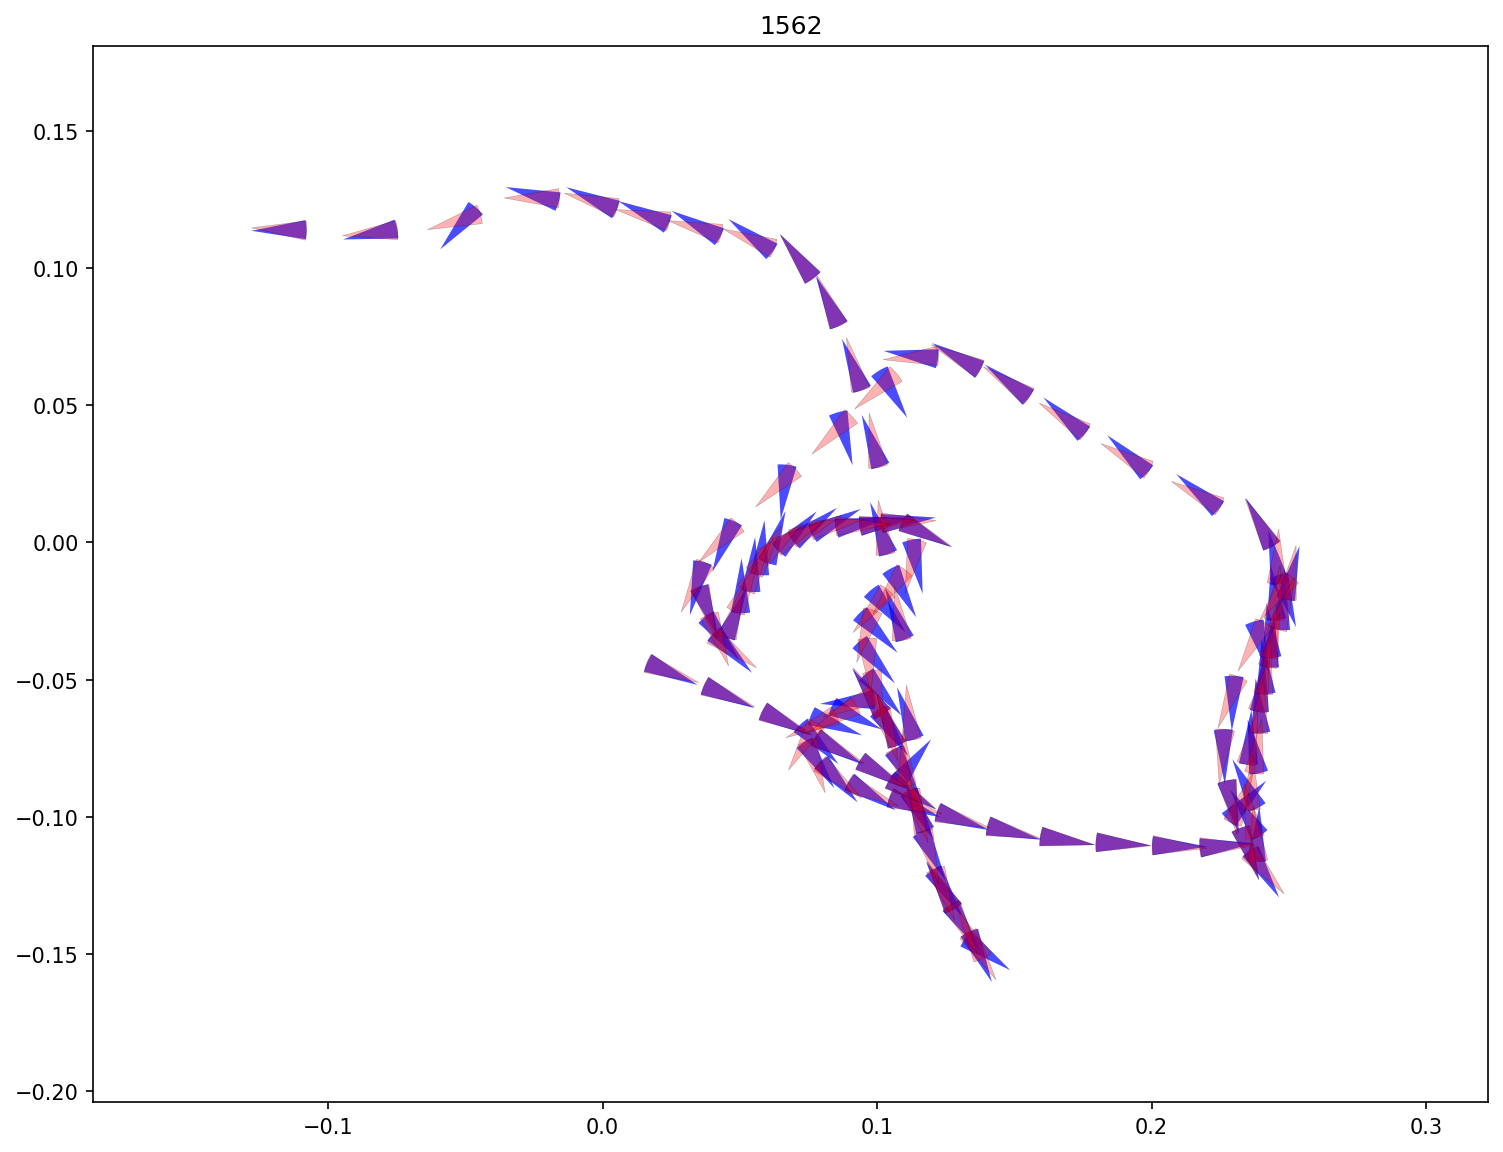

In [19]:
fig, ax = plt.subplots(figsize=(12, 12), dpi=150)
time_window = 4

input_names = [
    'groundspeed',
    'groundspeed_angle',
    'airspeed',
    'airspeed_angle',
    'thrust',
    'thrust_angle',
]

output_names = ['heading_angle_x', 'heading_angle_y']

time_augmentation_kwargs = {
    "time_window": time_window,
    "input_names": input_names,
    "output_names": output_names,
    "direction": "backward"
}

n_input = len(input_names) * time_window
n_output = len(output_names)

from scipy.ndimage import gaussian_filter1d
import matplotlib.colors as mcolors
import numpy as np
import fly_plot_lib_plot as fpl
blue_cmap = mcolors.LinearSegmentedColormap.from_list('blue_cmap', ['blue', 'blue'])# Define a colormap with a single color
red_cmap = mcolors.LinearSegmentedColormap.from_list('red_cmap', ['red', 'red'])
predicted_headings = plot_trajectory_with_predicted_heading(David_fly_data,ax,n_input,best_estimator,include_id=True,nskip=4,smooth=True,**time_augmentation_kwargs)

In [7]:
predicted_headings

array([-0.41894373, -0.41894373, -0.41894373, -0.41894373, -0.41966116,
       -0.4214512 , -0.42496705, -0.43087536, -0.43943378, -0.4503153 ,
       -0.46282932, -0.47623083, -0.48980823, -0.502856  , -0.5147815 ,
       -0.52525467, -0.53406924, -0.54070807, -0.5442043 , -0.54397374,
       -0.54161537, -0.5423316 , -0.5530031 , -0.57429266, -0.59050715,
       -0.56967837, -0.47940996, -0.3031461 , -0.03287966,  0.36615863,
        0.91208625,  1.4074688 ,  1.6963091 ,  1.8406452 ,  1.9132975 ,
        1.9533663 ,  1.9808336 ,  2.0078444 ,  2.0437803 ,  2.0949268 ,
        2.162293  ,  2.2434738 ,  2.3388934 ,  2.457729  ,  2.6356456 ,
       -3.063181  , -1.0047077 , -0.6960169 , -0.57899207, -0.5003057 ,
       -0.4321422 , -0.36901397, -0.3180308 , -0.29320213, -0.3070758 ,
       -0.36281222, -0.45082128, -0.55267787, -0.65000534, -0.73181003,
       -0.79618895, -0.84729594, -0.890899  , -0.93063927, -0.9656361 ,
       -0.9903214 , -0.99732685, -0.981994  , -0.945244  , -0.89